# лабораторная работа 3.7.1
## скин эффект в полом медном цилиндре

In [16]:
import matplotlib.pyplot as plt
from math import sqrt, tan, cos
import numpy as np
from scipy.optimize import curve_fit
from IPython.display import display, Math

In [17]:
def exp(x, A, k, C):
    return A * np.exp(k * x * 1e-3) + C

In [93]:
def plot(x_ax, x_err,
        y_ax, y_err,
        label_x, label_y,
        graph_name,
        approx):

    print("x_ax = ", x_ax)
    print("y_ax = ", y_ax)

    # plot_linear(x, I, 1, '')


    if approx == "lin":
        coeffs1, cov1 = np.polyfit(x_ax, y_ax, 1, cov = True)  # линейная аппроксимация
        a1, b1 = coeffs1  # I = a*x + b

        print("min = ", min(x_ax), "max =", max(x_ax))

        x_fit1 = np.linspace(min(x_ax), max(x_ax), 100)
        y_fit1 = a1*x_fit1 + b1

        sigma_a1 = np.sqrt(cov1[0,0])  # стандартная ошибка наклона
        sigma_b1 = np.sqrt(cov1[1,1])  # стандартная ошибка свободного члена

        print(f"a1 = {a1:.3f} ± {sigma_a1:.3f}")
        print(f"b1 = {b1:.3f} ± {sigma_b1:.3f}")
        print("Covariance matrix:\n", cov1)
        plt.plot(x_fit1, y_fit1, '-', label='Линейная аппроксимация')

    if approx == "exp":
        # Fit
        popt, pcov = curve_fit(exp, x_ax[:6], y_ax, p0=(1, 1, 0))  # initial guess (A, k, C)

        # Extract parameters
        A, k, C = popt
        A_err, k_err, C_err = np.sqrt(np.diag(pcov))

        print(f"A = {A:.3f} ± {A_err:.3f}")
        print(f"k = {k:.3f} ± {k_err:.3f}")
        print(f"C = {C:.3f} ± {C_err:.3f}")

        # Generate fitted curve
        x_fit = np.linspace(min(x_ax), max(x_ax), 500)
        y_fit = exp(x_fit, *popt)
        plt.plot(x_fit, y_fit, 'r', label="Fit")

    plt.errorbar(
        x_ax, y_ax,
        yerr=y_err,
        xerr=x_err,
        fmt= 'k.',
        # capsize=4,
        markersize=1,
        label='Эксперимент'
    )


    plt.suptitle(graph_name)
    plt.xlabel(label_x)
    plt.ylabel(label_y)

    plt.grid(True, which='both', alpha=0.5)
    plt.minorticks_on()
    # plt.legend()

    # plt.legend()
    plt.show()

### полученные данные

In [100]:
D = 0.045
h = 0.0015
nuh = 2260 # Гц
nu  = [ 22.5,  33,   44,   55,   66,   77,   88,    99,  110,  121] # Гц
# nu = [23, 32, 41, 50, 59, 68, 77, 86, 95, 104]

dnu = [0.001] * len(nu)
U   = [0.144, 0.2, 0.27, 0.33, 0.38, 0.42, 0.46, 0.495, 0.53, 0.55] # В
# U = [0.1722, 0.2351, 0.2952, 0.3505, 0.4026, 0.4504, 0.4917, 0.5290, 0.5595, 0.5904]

dU  = [0.001] * len(U)
U   = [U[i] * 1e3 for i in range(len(U))]
dU  = [dU[i] * 1e3 for i in range(len(U))]
I   = [  463, 460,  454,  447,  440,  432,  424,   416,  409,  402] # мА
# I = [483.36, 479.2, 474.9, 468.8, 463.4, 458.1, 449.1, 441.1, 432.5, 426.2]
dI  = [0.1] * len(I)
xi  = [U[i]/(nu[i] * I[i]) for i in range(len(nu))]
dxi = [sqrt((dI[i]/I[i]) ** 2 + (dU[i]/U[i]) ** 2 + (dnu[i]/nu[i]) ** 2) * xi[i] for i in range(len(xi))]

print(xi)
print(dxi)
print(nu)


[0.013822894168466522, 0.013175230566534914, 0.013516219463356027, 0.013422818791946308, 0.013085399449035813, 0.012626262626262626, 0.012328473413379074, 0.01201923076923077, 0.011780395643476329, 0.011307100859339666]
[9.60407012248674e-05, 6.593959692320435e-05, 5.014946209767539e-05, 4.078663211114138e-05, 3.456401253120829e-05, 3.0204718942806764e-05, 2.6958658550006182e-05, 2.4452867263523816e-05, 2.2413260931241803e-05, 2.0750095394318702e-05]
[22.5, 33, 44, 55, 66, 77, 88, 99, 110, 121]


### задание 7
### график в области низких частот

x_ax =  [5233.61816406 5473.80762689 5550.25       5840.17728532 6272.64
 6579.32582231 6922.24       7205.76753293 7821.6336    ]
y_ax =  [  506.25  1936.    3025.    4356.    5929.    7744.    9801.   12100.
 14641.  ]
min =  5233.6181640625 max = 7821.633599999999
a1 = 5.427 ± 0.169
b1 = -27639.389 ± 1079.703
Covariance matrix:
 [[ 2.86725893e-02 -1.81272761e+02]
 [-1.81272761e+02  1.16575822e+06]]


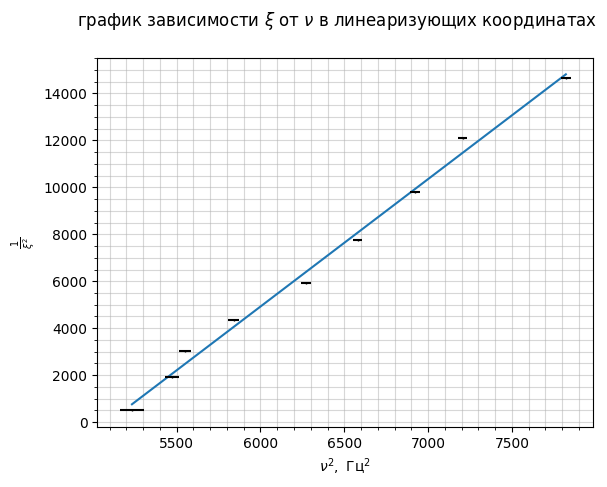

In [102]:
x_ax  = np.array([1/xi[i] ** 2 for i in range(len(xi))])
x_err = np.array([2 * dx / (x ** 3) if x != 0 else 0 for x, dx in zip(xi, dxi)])
y_ax = np.array(nu) ** 2
y_err = np.array([dnu[i]/nu[i] * 2 * nu[i] ** 2    for i in range(len(nu))])

mask  = x_ax != x_ax[1]
x_ax  = x_ax[mask]
y_ax  = y_ax[mask]
x_err = x_err[mask]
y_err = y_err[mask]

plot(x_ax, x_err,
     y_ax, y_err,
     r"$\nu^2, \ \text{Гц}^2$",
     r"$\frac{1}{\xi^2}$",
     r"график зависимости $\xi$ от $\nu$ в линеаризующих координатах",
     "lin")



In [2]:
k = 68
s = 110
nu = [s + k * i for i in range(16)] # Гц
nu = nu[:14]
nu.append(nu[len(nu)-1]+2 * k)
dnu = [0.001] * len(nu)
psi = [0, 4/13, 7/40, 5/40, 1/10, 3/40, 5/78, 0, 0, 1/38, 0, 1/50, 0, 1/100, 0] # * pi
dpsi = [0.34 * psi[i] for i in range(len(psi))]
xi  = [0, 9, 0, 6, 5.6, 4.9, 0, 0, 0, 3.1, 0, 2.7, 0, 2.3, 2] # * 10^(-3)

print(nu)
print(psi)





[110, 178, 246, 314, 382, 450, 518, 586, 654, 722, 790, 858, 926, 994, 1130]
[0, 0.3076923076923077, 0.175, 0.125, 0.1, 0.075, 0.0641025641025641, 0, 0, 0.02631578947368421, 0, 0.02, 0, 0.01, 0]


### задание 8
### график в области 0.05 ~ 0.5

9 9
x_ax =  [178 246 314 382 450 518 722 858 994]
y_ax =  [ 0.69025016  1.63185169  2.41421356  3.07768354  4.16529977  4.89832398
 12.06820528 15.89454484 31.82051595]
min =  178 max = 518
a1 = 0.012 ± 0.000
b1 = -1.472 ± 0.129
Covariance matrix:
 [[ 1.23306405e-07 -4.29106289e-05]
 [-4.29106289e-05  1.65958912e-02]]


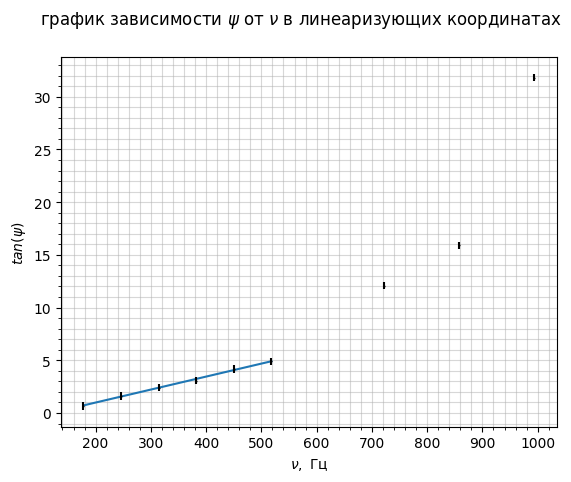

In [44]:
y_ax  = np.array([tan((psi[i] - 1/2) * np.pi) for i in range(len(psi))]) * (-1)
y_err = np.array([(dpsi[i] * np.pi)/abs(cos(psi[i] * np.pi)) * abs(tan((psi[i] + 1/2) * np.pi)) for i in range(len(psi))])
x_ax = np.array(nu)
x_err = np.array(dnu)
psi = np.array(psi)
mask  = psi != 0
x_ax  = x_ax[mask]
y_ax  = y_ax[mask]
x_err = x_err[mask]
y_err = y_err[mask]
print(len(x_ax), len(y_ax))
plot(x_ax, x_err,
     y_ax, y_err,
     r"$\nu, \ \text{Гц}$",
     r"$tan(\psi)$",
     r"график зависимости $\psi$ от $\nu$ в линеаризующих координатах",
     "lin")
# remove zeros (they break exp fitting)


In [3]:
nu   = [round(2200 * 1.1978 ** i) for i in range(16)]
dnu  = [0.001] * len(nu)
psi  = [1/10, 4/25, 3/25, 3/29, 1/6, 1/4, 7/24, 1/3, 2/5, 1/2, 1/2, 6/10, 7/10, 13/17, 6/7,  1]
dpsi = [0.34 * psi[i] for i in range(len(psi))]

xi  = [ 100,   87,   72,   60,  49,  40,   32,  26,  21,  17,  13,   11,  9.4,    9, 10.4, 21]
print(nu)
print(psi)

[2200, 2635, 3156, 3781, 4529, 5424, 6497, 7782, 9322, 11166, 13374, 16020, 19188, 22984, 27530, 32975]
[0.1, 0.16, 0.12, 0.10344827586206896, 0.16666666666666666, 0.25, 0.2916666666666667, 0.3333333333333333, 0.4, 0.5, 0.5, 0.6, 0.7, 0.7647058823529411, 0.8571428571428571, 1]


In [85]:
y_ax  = np.array([sqrt(nu[i]) for i in range(len(nu))])
dsqnu = [nu[i] ** (1/2) * dnu[i] / (sqrt(nu[i]) * 2) for i in range(len(nu))]
y_err = np.array(dsqnu)
x_ax  = np.array([(psi[i] - 1/4) * np.pi for i in range(len(psi))])
x_err = np.array(dpsi) * 0
mask  = y_ax != y_ax[5]
x_ax  = x_ax[mask]
y_ax  = y_ax[mask]
x_err = x_err[mask]
y_err = y_err[mask]

### задание 9
### график в области 0.5 ~ 15

x_ax =  [ 46.9041576   51.33225107  56.17828762  61.48983656  67.29784543
  80.60397013  88.21564487  96.55050492 105.66929545 115.6460116
 126.57013866 138.52075657 151.60474927 165.92166827 181.59019797]
y_ax =  [-0.4712389  -0.28274334 -0.40840704 -0.46040582 -0.26179939  0.13089969
  0.26179939  0.4712389   0.78539816  0.78539816  1.09955743  1.41371669
  1.61699622  1.90739554  2.35619449]
min =  46.9041575982343 max = 181.59019797334878
a1 = 0.023 ± 0.001
b1 = -1.802 ± 0.149
Covariance matrix:
 [[ 1.01037797e-06 -1.48164103e-04]
 [-1.48164103e-04  2.22402715e-02]]


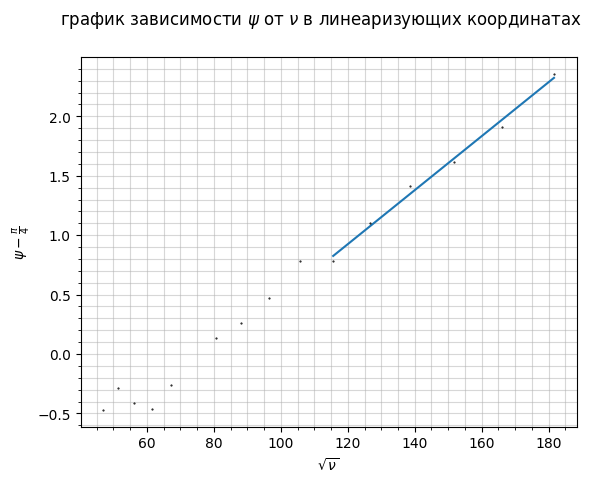

In [86]:
plot(
     y_ax, y_err,
     x_ax, x_err,
     r"$\sqrt{\nu}$",
     r"$\psi-\frac{\pi}{4}$",
     r"график зависимости $\psi$ от $\nu$ в линеаризующих координатах",
     "lin")

In [26]:
nu = [  2,    3,    5,  7.5,   10,   12,   15,   20,   25,  30]
L  = [2.9, 2.89, 2.89, 2.91, 2.97, 3.05, 3.22, 3.72, 4.77, 7.4]
L  = [L[i] * 1e3 for i in range(len(L))]
dnu = [0.001] * len(nu)
dL  = [1e-5]  * len(L)

x_ax  = np.array(nu)
x_err = np.array(dnu)
y_ax  = np.array(L)
y_err = np.array(dL)

# remove zeros (they break exp fitting)
mask  = y_ax != 0
x_ax  = x_ax[mask]
y_ax  = y_ax[mask]
x_err = x_err[mask]
y_err = y_err[mask]


### задание 10
### график индуктивности от частоты

x_ax =  [ 2.   3.   5.   7.5 10.  12.  15.  20.  25.  30. ]
y_ax =  [2900. 2890. 2890. 2910. 2970. 3050. 3220. 3720. 4770. 7400.]
A = 29.327 ± 2.389
k = 168.220 ± 2.702
C = 2834.011 ± 14.177


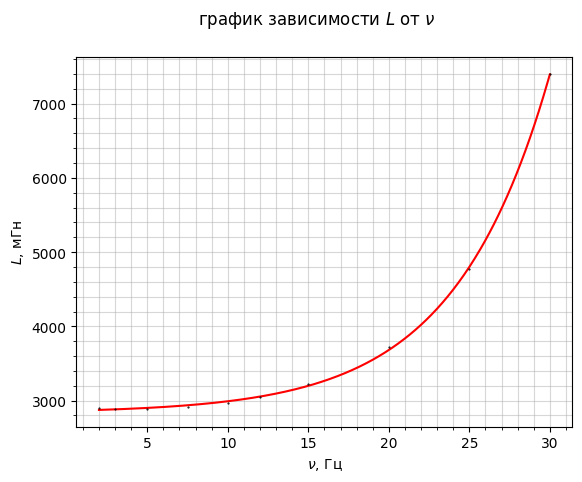

In [27]:
plot(x_ax, x_err,
     y_ax, y_err,
     r"$\nu$, Гц",
     r"$L$, мГн",
     r"график зависимости $L$ от $\nu$",
     "exp")

In [28]:
L_max = max(L)
L_min = min(L)

In [29]:
x_ax  = np.array(nu) ** 2
x_err = np.array(dnu) * sqrt(2)
y_ax  = np.array([(L_max - L_min)/(L[i] - L_min) if L[i] != L_min else 0 for i in range(len(L))])
y_err = np.array([y_ax[i] * sqrt((2 * dL[i]/(L_max - L_min)) ** 2 + (2 * dL[i] / (L[i] - L_min)) ** 2) if L[i] != L_min else 0 for i in range(len(L))])

# remove zeros (they break exp fitting)
mask  = y_ax != 0
x_ax  = x_ax[mask]
y_ax  = y_ax[mask]
x_err = x_err[mask]
y_err = y_err[mask]

print(y_ax)
print(y_ax > 0)

[451.         225.5         56.375       28.1875      13.66666667
   5.43373494   2.39893617   1.        ]
[ True  True  True  True  True  True  True  True]


### задание 10
### график индуктивности от частоты в линеаризующих координатах

x_ax =  [  4.    56.25 100.   144.   225.   400.   625.   900.  ]
y_ax =  [451.         225.5         56.375       28.1875      13.66666667
   5.43373494   2.39893617   1.        ]
min =  4.0 max = 900.0
a1 = -0.301 ± 0.169
b1 = 190.367 ± 71.903
Covariance matrix:
 [[ 2.86199006e-02 -8.78004888e+00]
 [-8.78004888e+00  5.17006363e+03]]


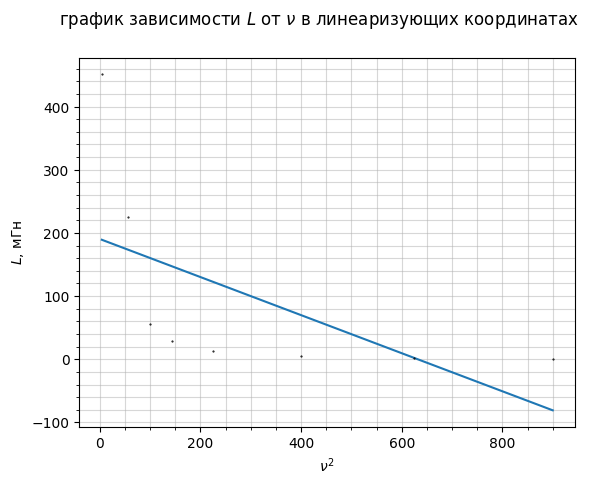

In [30]:
plot(x_ax, x_err,
     y_ax, 0*y_err,
     r"$\nu^2$",
     r"$L$, мГн",
     r"график зависимости $L$ от $\nu$ в линеаризующих координатах",
     "lin")